<a href="https://colab.research.google.com/github/Giovannisb/Portfolio_data_science/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://image.freepik.com/vetores-gratis/acidente-de-naufragio-navio-encalhado-pia-no-oceano_33099-2210.jpg'></center>

# Investigando o Titanic com Data Science

Operado pela White Star Line, empresa britânica de navegação, o Titanic foi criado para saciar a demanda por viagens de luxo entre a Europa e a América. A construção do navio teve início em março de 1909, em Belfast, na Irlanda. 

Quando foi enviado à Inglaterra para ser abastecido, o Titanic era um dos maiores navios de sua época. Possuia 53 metros de altura, 28 metros de largura e 266 metros de comprimento, o tamanho de quase três campos de futebol americano. 

O Titanic também contava com novos recursos de segurança, como 16 compartimentos feitos para impedir que o casco inundasse. Isso fez muitos acreditarem que o navio era inafundável. Esse excesso de confiança levou a infeliz decisão de cortar pela metade o número de botes salva-vidas a bordo para o convés ficar mais ordenado e elegante. 

Em 10 de abril de 1912, o Titanic deixou o porto de Southampton, na Inglaterra e embarcou em sua primeira e última viagem. Suas primeiras escalas foram na França e na Irlanda, depois partiu em uma longa jornada pelo mar, em direção a Nova York, com cerca de 2200 pessoas a bordo.

Em 14 de abril, em plena noite, foram emitidos alertas aos operadores de rádio do Titanic referentes a campos de gelo, nunca transmitidos à ponte de comando. A cerca de 800km da costa de Newfoundland, no Canadá, a tripulação de vigia do Titanic avistou um iceberg na rota do navio e avisou a ponte de comando, mas era tarde demais. 

O iceberg rasgou a lateral direita do navio, fazendo seus compartimentos, originalmente considerados impermeáveis, encherem de água. Os operadores de rádio do Titanic começaram a enviar sinais de socorro. Após um tempo, o navio Carpathia, alí próximo, recebeu um dos sinais de socorro e traçou seu rumo em direção ao Titanic. Ao mesmo tempo, a tripulação começou a por mulheres e crianças nos poucos botes salva-vidas a bordo.

Além da falta de salva-vidas, alguns dos que foram usados não foram ocupados até sua capacidade total, fazendo com que mais pessoas ficassem presas no navio. Em algumas horas, a proa do navio começou a afundar e erguer a popa. Poucos minutos depois o navio se partiu em dois fanzendo com que o navio naufragasse. 

Algumas horas depois de receber o aviso de socorro, o Carpathia chegou para socorrer os passageiros. Das 2200 pessoas a bordo do Titanic, apenas 705 sobreviveram.

O desafio do Kaggle, plataforma de datasets e competições de data science e machine learning, se dá em desenvolver um modelo de machine learning para prever, atravez dos dados dos passageiros do Titanic, quem teria sobrevivido ou não. 


## Obtenção dos Dados

Os dados da competição podem ser acessados[aqui](https://www.kaggle.com/c/titanic/overview).

Os dados estão divididos em dois arquivos **.csv**. O arquivo `train.csv` contém os dados para construir e treinar o modelo de machine learning e o arquivo `test.csv` é o conjunto de dados que iremos utilizar para testar o modelo.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df_train = pd.read_csv('path/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df_test = pd.read_csv('path/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploração dos Dados

Nessa etapa iremos explorar alguns aspectos dos dados fornecidos, como aspectos estatisticos, outliers, valores nulos e outros.

In [148]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Podemos observar de imediato alguns aspectos como:
* A nossa variável alvo é a colunas `Survived`
* `PassagerId` é o id do passageiro
* A coluna `Pclass` referencia qual a classe do passageiro
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* `SibSp`: Quantidade de cônjuges e irmãos a bordo
* `Parch`: Quantidade de pais e filhos a bordo 
* `Fare`: Quanto foi pago pela passagem
*`Embarked`: Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

In [149]:
display((df_train.isnull().sum() / df_train.shape[0]) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Duas variáveis tem uma quantidade significante de valores faltantes, são elas a variável `Age` com 19.8% e `Cabin` com 77.1%, já a coluna Embarked tem apenas 0.22% de valores faltantes.

In [150]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


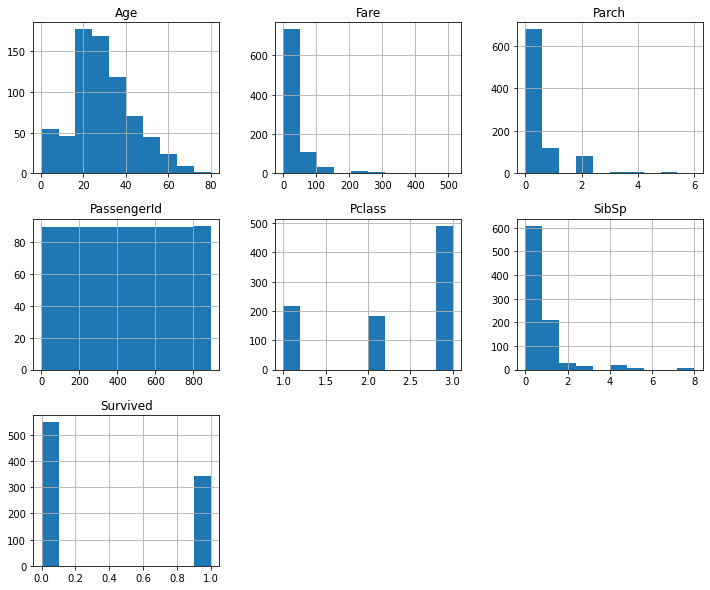

In [151]:
df_train.hist(figsize=(12,10));

In [152]:
print('Idade média dos passageiros: {:.0f}'.format(df_train.Age.mean()))
print('Valor médio pago no ticket: {:.2f}'.format(df_train.Fare.mean()))

Idade média dos passageiros: 30
Valor médio pago no ticket: 32.20


A idade média dos passageiros no Titanic era de 30 anos e o valor médio pago na passagem foi de 32.20 dólares.

### Quem tinha mais chances de sobreviver ao naufrágio?

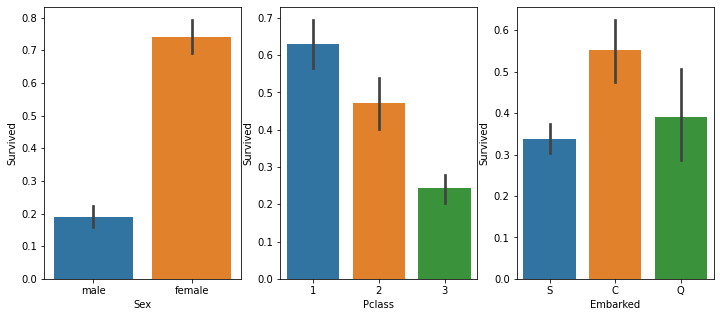

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))

sns.barplot(x='Sex', y='Survived', data=df_train, ax=ax1)
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=ax3);

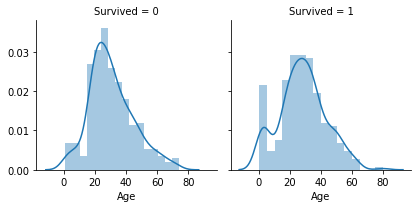

In [154]:
age_surv = sns.FacetGrid(df_train, col='Survived')
age_surv.map(sns.distplot, 'Age');

Naquela época, tinha-se a ordem de salvar primeiro mulheres e crianças nos botes salva-vidas. Tendo como verdadeira essa premissa, podemos observar que isso realmente acontecia. Como podemos observar, um número muito superior de mulheres e crianças sobreviveram ao naufrágio em comparação ao de homens, assim como pessoas de primeira classe em comparação as demais. A maioria dos não sobreviventes tinham idade entre 20 e 30 anos.

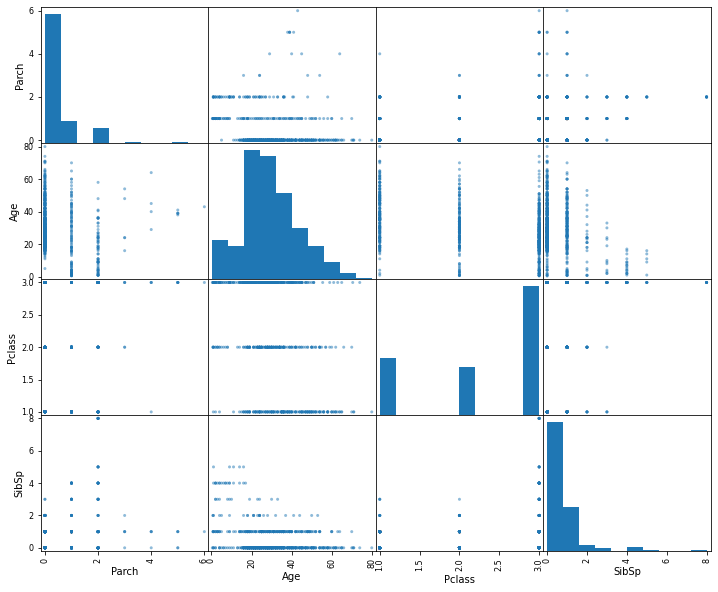

In [155]:
columns = ['Parch', 'Age', 'Pclass', 'SibSp']
pd.plotting.scatter_matrix(df_train[columns], figsize=(12,10));

Rapidamente a gente consegue ver coisas como, o fato de que pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe.

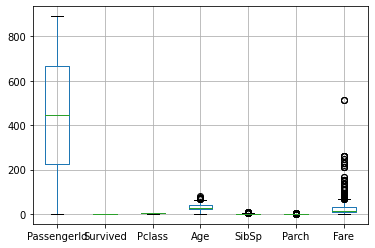

In [156]:
df_train.boxplot()

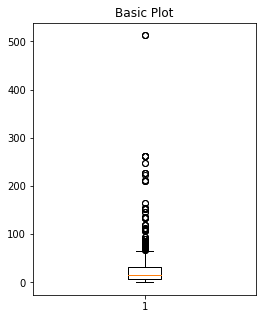

In [157]:
fig1, ax1 = plt.subplots(figsize=(4,5))
ax1.set_title('Basic Plot')
ax1.boxplot(df_train.Fare);

In [158]:
qtd = df_train.Fare.loc[df_train.Fare > 70].value_counts().sum()
print(qtd)
print("qtd: {:.2f}%".format((qtd / df_train.shape[0])))

105
qtd: 0.12%


A coluna `Fare` é referente ao quanto a pessoa pagou pela passagem, e como podemos observar temos alguns outliers. Levando em consideração o valor máximo dentro do gráfico *boxplot*, temos quase apenas 0.12% dos valores acima do máximo, que consideramos `outliers`, um número bastante baixo que podemos desconsiderar a remoção deles do dataframe.

Outros valores como `SibSp` e `Parch`, não apresentam valores discrepantes que sejam considerados outliers.

## Preparando os dados

Iremos iniciar a preparação dos dados para a criação do modelo de machine learning. Nessa etapa iremos fazer o pré processamento das variáveis e fazer a estruturação do dataframe para que possamos obter o melhor modelo.

Iremos unir os dataframes de treino e teste para estrutura-los e depois separamos de volta. Desta forma economizamos tempo e trabalho pois, se formos fazer separados, além de levar mais tempo e fazer trabalho dobrado, poderiamos esquecer de algum detalhe de um para o outro.

In [159]:
train_idx = df_train.shape[0]
test_idx = df_test.shape[0]

PassagerId = df_test.PassengerId

target = df_train.Survived.copy()
df_train.drop(['Survived'], axis=1, inplace=True)

df = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

print("dimonssões do dataframe unido: ({} x {})".format(df.shape[0], df.shape[1]))

dimonssões do dataframe unido: (1309 x 11)


In [160]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Algumas variáveis do dataset não são úteis para nosso modelo, como por exemplo, `PassengerId`, `Name`, `Ticket`, `Cabin`. São variáveis que representam dados como nome, número da passagem, número da cabine, que são irrelevantes para treinar o modelo de machine learning.

### Valores faltantes

Nem sempre é correto deletar informações de uma linha inteira só porque tem um dado faltante. O mais correto, dependendo do caso, é preencher esse dado faltante com a média ou a mediana dos dados presentes.

In [161]:
df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para as variáveis idade e tarifa, vou colocar o valor da mediana; e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [162]:
age_med = df.Age.median()
df.Age.fillna(age_med, inplace=True)

fare_med = df.Fare.median()
df.Fare.fillna(fare_med, inplace=True)

embarked_frq = df.Embarked.value_counts()[0]
df.Embarked.fillna(embarked_frq, inplace=True)

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números. Irei converter os valores da variável `sex` em um binário, atribuindo 0 para *male* e 1 para *female*. Já a variável Embarked, apliquei o conceito de variáveis dummies. As variáveis dummies assumem apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável. 

In [163]:
df.Sex = df.Sex.map({'male': 0, 'female':1})

embarked_dum = pd.get_dummies(df.Embarked, prefix='Embarked')
df = pd.concat([df, embarked_dum], axis=1)
df.drop('Embarked', axis=1, inplace=True)

In [164]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Preparando os datasets de treino e test

Agora que preparamos o dataset com todos os dados, iremos separar novamente os dados para treino e para testes. 

In [165]:
df_train = df.iloc[:train_idx]
df_test = df.iloc[:test_idx]

## Construindo o modelo

Iremos iniciar nossa construção do modelo de machine learning. Iremos testar algumas abordagens como regressão logística, arvore de decisão, XGBoost e votting classifier. Dessa forma, podemos ver qual modelo tem a melhor acurácia e daremos prosseguimento a criação do modelo.

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
!pip install scikit-plot -q
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [167]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_xgb = XGBClassifier()
voting = VotingClassifier(estimators=[('lr', model_lr), ('dt', model_dt), ('xgb', model_xgb)])

# 3. Separar os dados entre feature matrix e target vector 
X = df_train
y = target

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
for model in (model_lr, model_xgb, model_dt, voting):
    model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
model = []
accuracy = []
for clf in (model_lr, model_xgb, model_dt, voting):
    y_pred = clf.predict(X_test)
    model.append(clf.__class__.__name__)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Verificar a acurácia
col = ['Acurácia']
ac = pd.DataFrame(data=accuracy, index = model,columns=col)
ac

AUC: 0.8121

AUC: 0.7936

AUC: 0.7356

AUC: 0.8086



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Acurácia
LogisticRegression,0.825112
XGBClassifier,0.811659
DecisionTreeClassifier,0.748879
VotingClassifier,0.829596


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8188    0.9173    0.8652       133
           1     0.8514    0.7000    0.7683        90

    accuracy                         0.8296       223
   macro avg     0.8351    0.8086    0.8168       223
weighted avg     0.8319    0.8296    0.8261       223

Acurácia: 0.8296

AUC: 0.8086



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


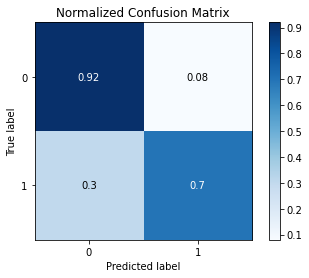

In [168]:
import scikitplot as skplt

model = VotingClassifier(estimators=[('lr', model_lr), ('dt', model_dt), ('xgb', model_xgb)])
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred_res = model.predict(X_test)
# y_proba_res = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Como podemos observar, o modelo VotingClassifier teve a melhor acurácia(82%)  e o melhor valor AUC(80%). Iremos agora submeter o modelo para a avaliação na competição.

In [169]:

y_pred_xgb = model.predict(df_test)

submission = pd.DataFrame({"PassengerId": PassagerId,
                           "Survived": y_pred_xgb
})

submission.to_csv('./submission.csv', index=False)

Com este modelo, obtivemos um score de 0.55, um bom score para um primeiro modelo para competição. [link](https://www.kaggle.com/c/titanic/submissions)